**Linear Regression (For Regression Problem)**

**(Code: Subhajit Das)**

**What is Linear Regression?**

Linear Regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features.

When the number of the independent feature is 1, it is known as **Univariate Linear Regression**, and in the case of more than one feature, it is known as **Multivariate Linear Regression**. The goal of the algorithm is to find the best linear equation that can predict the value of the dependent variable based on the independent variables.

The equation provides a straight line that represents the relationship between the dependent and independent variables. The slope of the line indicates how much the dependent variable changes for a unit change in the independent variable(s).

Linear regression is used in many different fields, including finance, economics, and psychology, to understand and predict the behavior of a particular variable¹. For example, in finance, linear regression might be used to understand the relationship between a company’s stock price and its earnings or to predict the future value of a currency based on its past performance.

In statistics, linear regression is a linear approach for modeling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

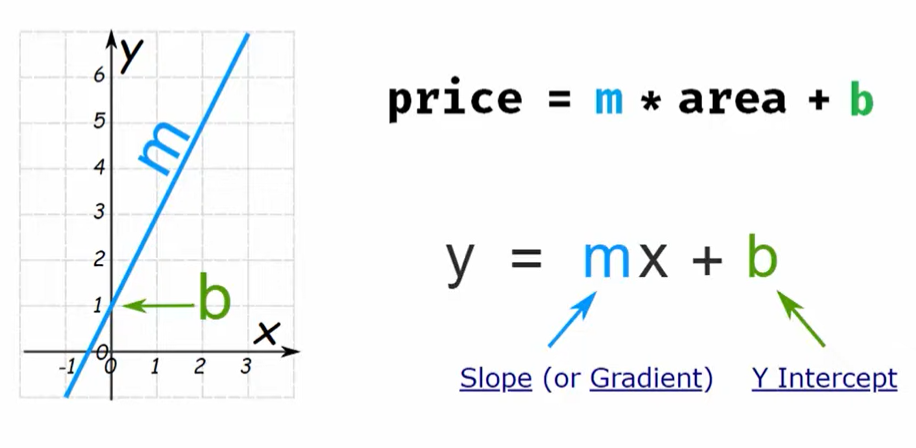

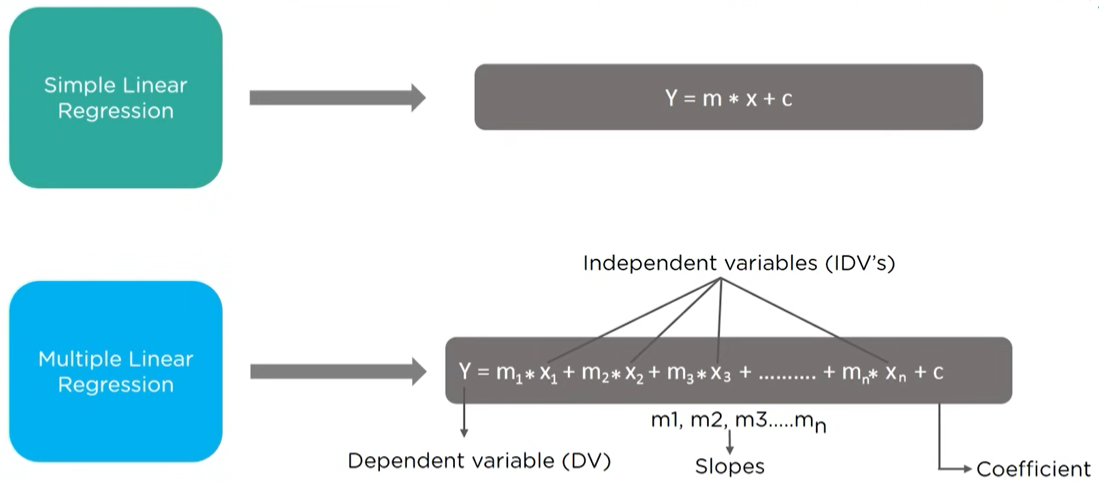

**What we can use Linear Regression?**

Linear Regression has a wide range of applications in various fields. Here are some examples:

1. **Forecasting Revenue**: Linear regression can be used to forecast a company's revenue based on past performances.

2. **Salary Estimation**: It can be used to estimate the salary range for a job based on the current job market.

3. **Stock Market Analysis**: Linear regression can be used to study how the stock market has performed over time, which can be useful for making investment decisions.

4. **Predicting Future Outcomes**: Linear regression can be used to predict future outcomes based on historical data.

5. **Understanding Relationships**: It can be used to understand the relationship between different variables.

6. **Modelling Trends**: Linear regression can be used to model trends in data.

7. **Machine Learning Models**: Linear regression is often used in machine learning models to predict the behavior of a particular variable.

8. **Forecasting Sectors**: It is used in forecasting sectors to describe the behavior of a set of data.

9. **Quantitative Applications**: Linear regression is used in various quantitative applications.

10. **Finance, Economics, and Psychology**: Linear regression is used in many different fields, including finance, economics, and psychology, to understand and predict the behavior of a particular variable.

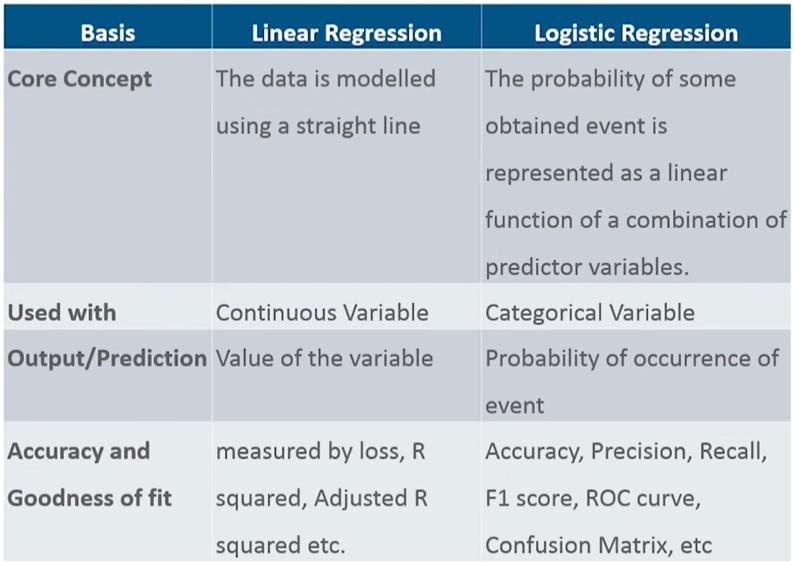

**How Linear Regression works:**

1. **Data Collection**: The first step in linear regression is to collect data. This data should include both the independent and dependent variables.

2. **Model Specification**: The next step is to specify the model. This involves deciding which variables will be used as the independent variables and which will be the dependent variable.

3. **Fitting the Model**: Once the model is specified, the next step is to fit the model to the data. This involves finding the line of best fit that minimizes the sum of the squared residuals.

4. **Making Predictions**: After the model has been fitted, it can be used to make predictions. This involves plugging in the values of the independent variables into the equation of the line and solving for the dependent variable.

5. **Interpreting the Results**: The final step is to interpret the results. This involves understanding what the slope and intercept of the line mean in the context of the data.

6. **Evaluation**: The model's performance is evaluated using various metrics like R-squared, Mean Squared Error (MSE), etc.

Remember, the goal of linear regression is to find the best linear equation that can predict the value of the dependent variable based on the independent variables.

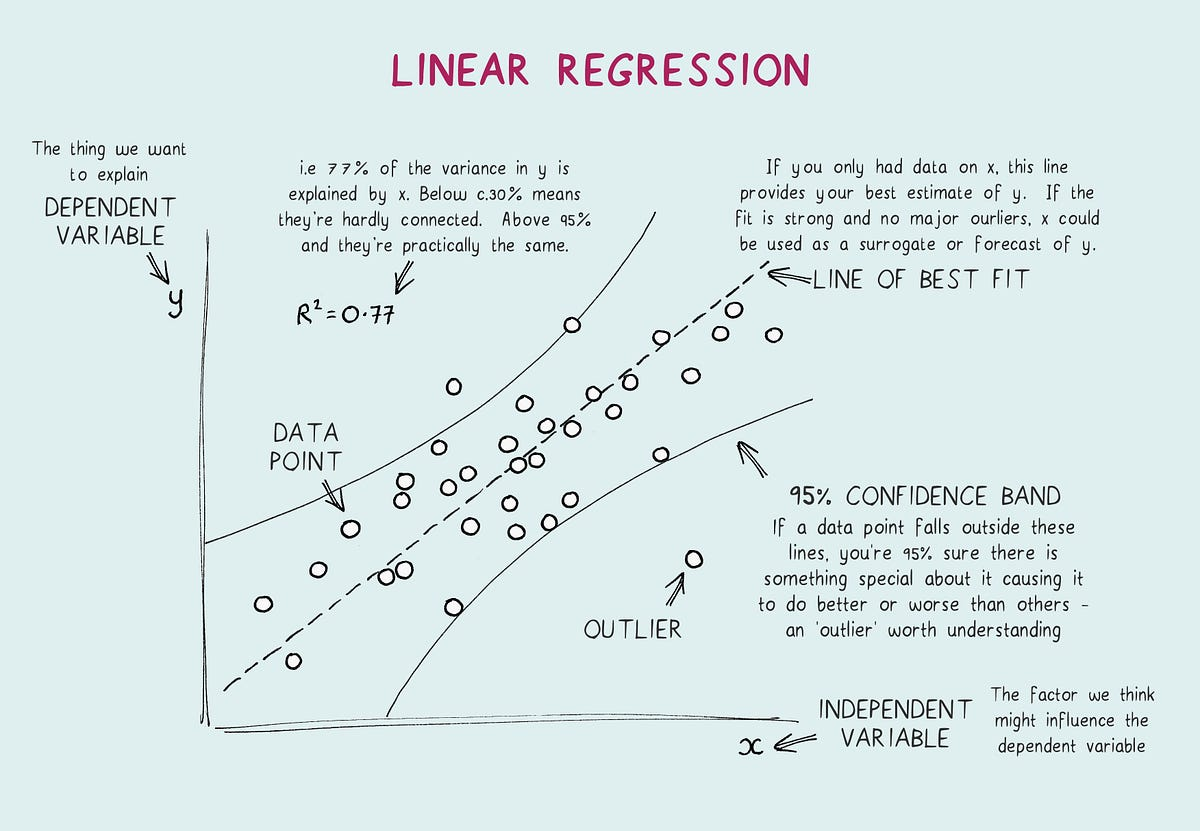

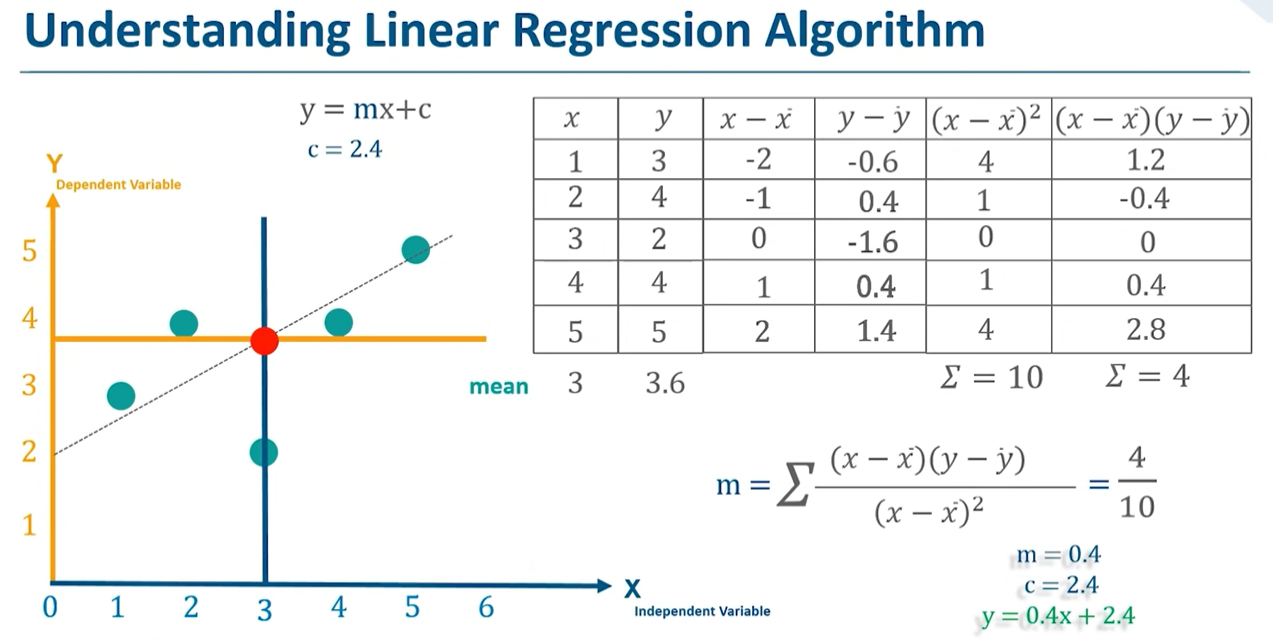

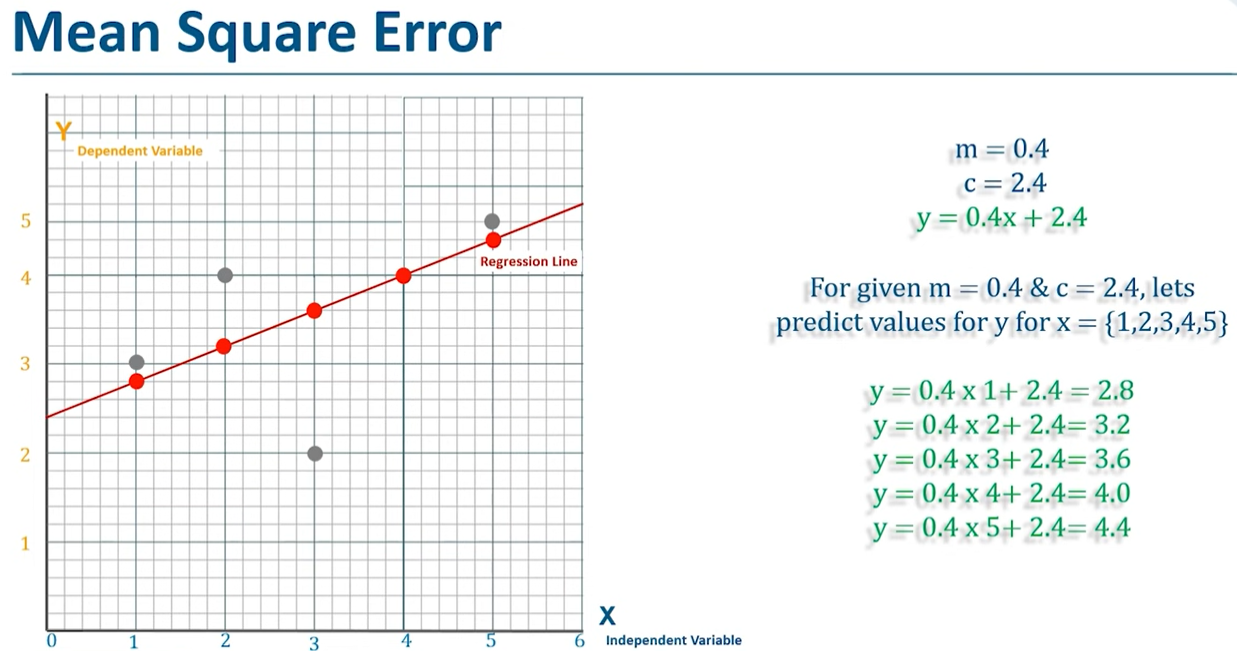

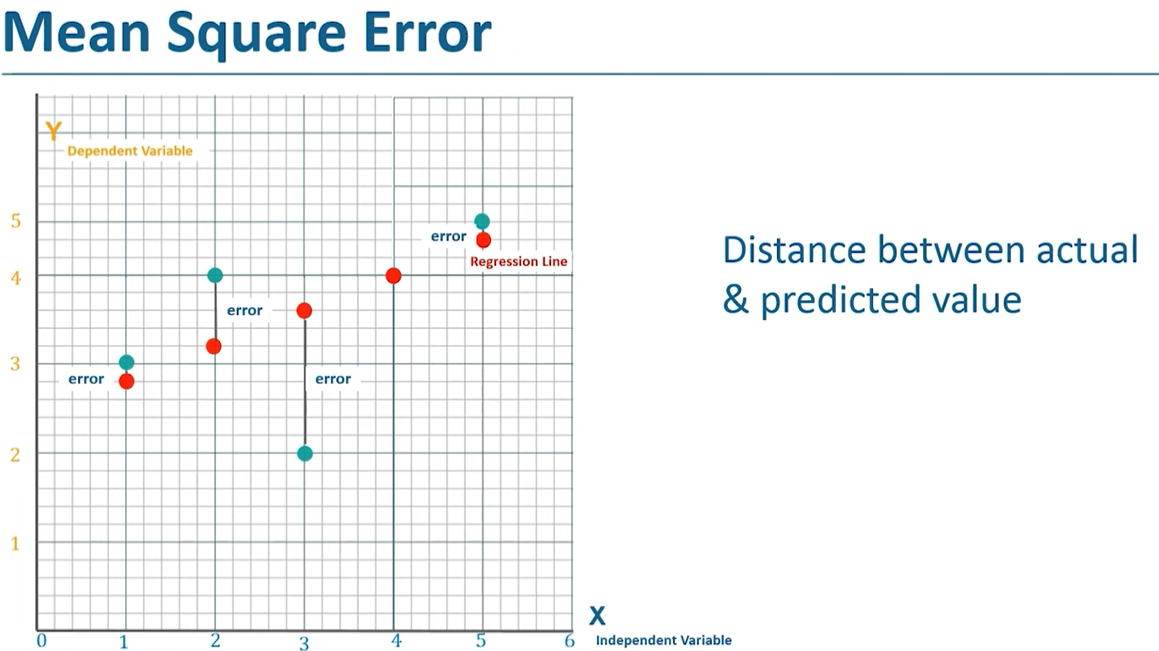

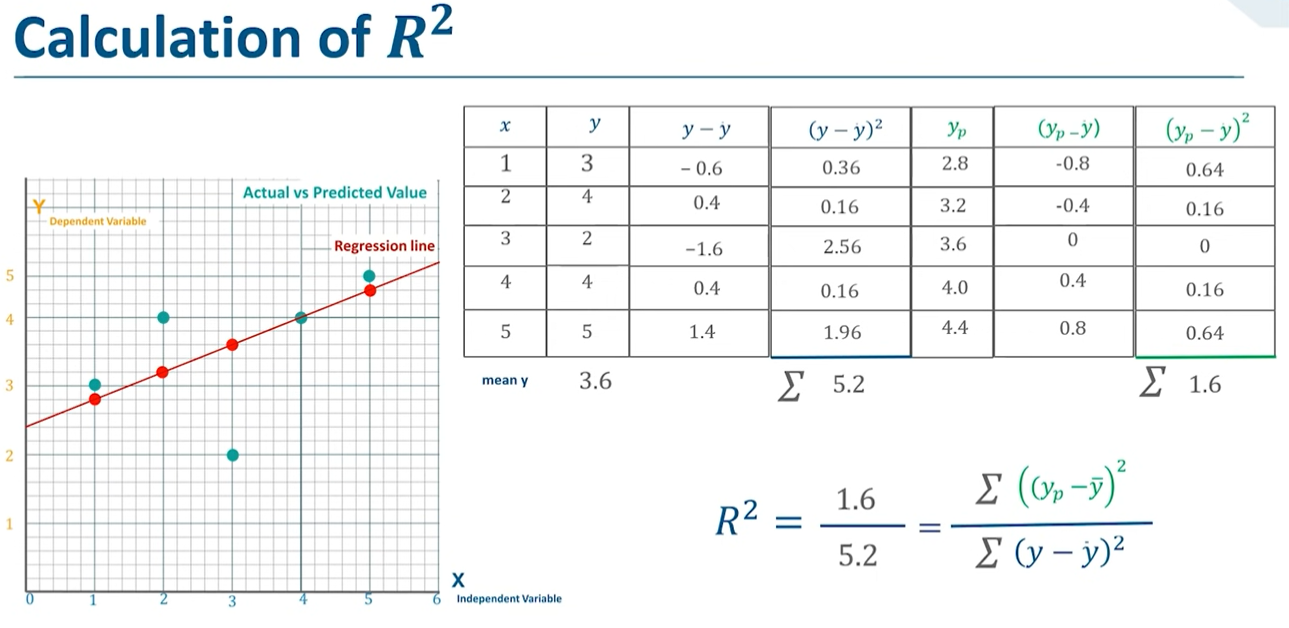

**Gradient Descent:**

 Gradient Descent is an iterative optimization algorithm that tries to find the optimum value (Minimum/Maximum) of an objective function. It is one of the most used optimization techniques in machine learning projects for updating the parameters of a model in order to minimize a cost function. The main aim of gradient descent is to find the best parameters of a model which gives the highest accuracy on training as well as testing datasets. In gradient descent, the gradient is a vector that points in the direction of the steepest increase of the function at a specific point. Moving in the opposite direction of the gradient allows the algorithm to gradually descend towards lower values of the function, and eventually reaching to the minimum of the function.

**Slope:**

In the context of linear regression, the slope (often denoted by ‘b’ or ‘m’) represents the rate of change of the dependent variable (Y) with respect to the independent variable (X). In other words, it quantifies the change in the output Y that results from a unit change in the input X.

**Formula:**
**Y = a + bX**, where

‘a’ is the y-intercept,

‘b’ is the slope,

‘X’ is the independent variable,

and ‘Y’ is the dependent variable

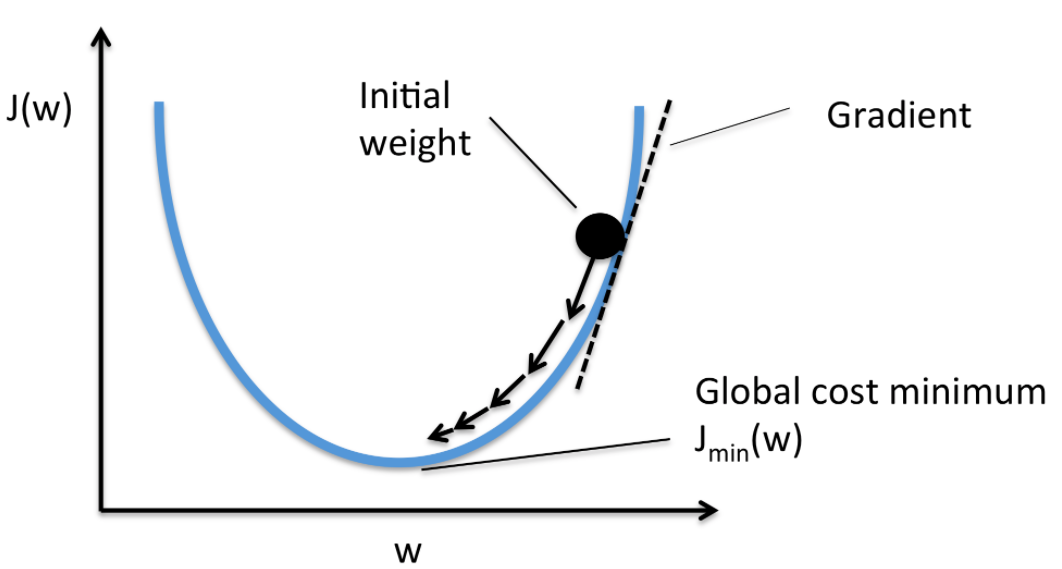

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **1000 Companies Profit**

In [ ]:
profit_df = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/12_1000_Companies.csv")
profit_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
profit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
profit_df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

**Data Visualizations**

<ipython-input-5-5184aefa3c2d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(profit_df.corr()) # More closer to 1, it denotes more connection or correlation


<Axes: >

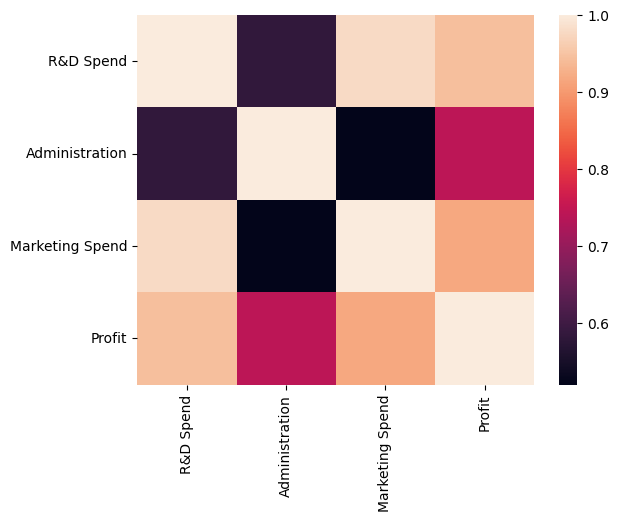

In [ ]:
# Building the Correlation Matrix
# Creating a heatmap of the correlation matrix of the DataFrame. This can be very useful for visualizing the relationships between different variables in the DataFrame.
sns.heatmap(profit_df.corr()) # More closer to 1, it denotes more connection or correlation

**Converting State (String to Int) using LabelEncoder**

In [ ]:
profit_df['State'].value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Le = LabelEncoder()

In [ ]:
profit_df['State'] = Le.fit_transform(profit_df['State'])
profit_df['State'].head(8)

0    2
1    0
2    1
3    2
4    1
5    2
6    0
7    1
Name: State, dtype: int64

**Separating features and labels**

In [ ]:
x = profit_df.drop(['Profit'], axis = 1)
x.tail()

,R&D Spend,Administration,Marketing Spend,State
995,54135.00,118451.999,173232.6695,0
996,134970.00,130390.080,329204.0228,0
997,100275.47,241926.310,227142.8200,0
998,128456.23,321652.140,281692.3200,0
999,161181.72,270939.860,295442.1700,2


In [ ]:
y = profit_df['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# length or sample of train dataset
len(x_train)

700

In [ ]:
# length or sample of test dataset
len(x_test)

300

**Using Linear Regression**

**Parameters used in Linear Regression:**

The parameters used in Linear Regression include:
1. **Dependent Variable (Y)**: This is the variable that we want to predict or forecast.
2. **Independent Variable (X)**: These are the variables that we use to predict or forecast the dependent variable.
3. **Intercept (b0)**: This is the predicted value of Y when X is 0.
4. **Slope (b1)**: This is the regression coefficient, which represents the change in the dependent variable for a unit change in the independent variable.
5. **Error Term (ϵ)**: This is the difference between the observed and predicted values.
6. **fit_intercept**: This specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
7. **normalize**: This parameter is used to normalize the input variables (X) before regression.
8. **copy_X**: This parameter is used to copy the input variables (X). If False, the input variables may be overwritten during the normalization process.
9. **n_jobs**: This is the number of CPU cores used during cross-validation when the 'cross_validate' method is used.
10. **positive**: This parameter forces the coefficients to be positive when it is set to True. This is only applicable for certain solvers like 'lsqr', 'sparse_cg', and 'saga'.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin = LinearRegression()

In [ ]:
# Fit the model
lin.fit(x_train, y_train)

LinearRegression()

In [ ]:
# m is the slope of the line. It measures the steepness of the line or the rate of change. For each unit increase in the x-variable, the y-variable changes by m units.
m = lin.coef_
m

In [ ]:
# c is the y-intercept. It is the value of y when x is 0. In other words, it’s the point where the line crosses the y-axis.
c = lin.intercept_
c

-69878.10482437348

In [ ]:
# Printing y = mx + c
# It is the slope-intercept form of a linear equation
Y_pred_train = m * x_train + c
Y_pred_train

,R&D Spend,Administration,Marketing Spend,State
735,-15725.946067,56837.383101,-50444.564261,-69447.840082
627,-28356.955227,53488.137359,-53746.178320,-69878.104824
488,-8336.564930,58796.755788,-48513.057101,-69447.840082
186,-60075.263314,45077.692077,-62037.013245,-69447.840082
555,-30258.263445,52983.985322,-54243.160453,-69878.104824
...,...,...,...,...
283,-62531.214186,44426.470750,-62678.973187,-69878.104824
558,-2658.701113,60302.301477,-47028.922715,-69447.840082
246,12508.141058,64323.950221,-43064.468356,-69878.104824
473,-39037.367188,50656.112988,-56537.926616,-69447.840082


In [ ]:
y_test.head(8)

940     94974.98049
172     65814.59883
761    119961.29450
345    100435.61090
915    106235.39500
875    159173.26840
259    158338.62580
1      191792.06000
Name: Profit, dtype: float64

In [ ]:
y_pred = lin.predict(x_test)
print(y_pred)

[ 95127.62106008  65176.50783547 120422.80409595  99795.22377353
 106096.96677029 159258.96841799 158844.27294007 210289.4346206
 110739.05938872 129793.90379497 165491.95464159 133951.08136229
  64868.18922501  63688.52945783 165708.60110257 162441.62472831
 154705.52607181 250451.34585631 146748.8902823   87719.73266256
  59334.38653938 111264.02239848 105433.19415916  81094.53504012
 120411.9924245   52693.23813107  50673.37594615 110630.08606903
  95382.75227148  97460.124136    79127.86427744  62207.03840788
  72483.2085765  149819.97671131  98266.59939504 174017.66497855
  72182.6716076   53277.01306511  56299.23838957  86506.77713715
 142886.02907949 151128.49939269 116608.80595612 104498.28945421
 144367.52012944  88813.33871911  85377.71418901  96923.91609589
  73361.03098528 163601.38883302 181847.1655343  136812.17550471
 152993.98456056 130334.86757009 115760.38647013 161379.15339065
 170045.83241601  82521.54241719 114509.81085809 120779.55437045
  63317.94151129  73946.53

**Metrices used in Linear Regression**

There are several metrics used to evaluate the performance of a Linear Regression model:

1. **R-squared (Coefficient of Determination)**: This metric provides an indication of the goodness of fit of a set of predictions to the actual values. In other words, it explains how much the total variance of the dependent variable can be reduced by using the least square regression.

2. **Adjusted R-squared**: This is a modified version of R-squared that has been adjusted for the number of predictors in the model. It increases only if the new term improves the model more than would be expected by chance.

3. **F-Test**: It is used to assess the significance of the overall regression model. Specifically, it tests the null hypothesis that all of the regression coefficients are equal to zero.

4. **Mean Absolute Error (MAE)**: This is the mean of the absolute value of the errors. It measures the average magnitude of the errors in a set of predictions, without considering their direction.

5. **Mean Squared Error (MSE)**: This is the mean of the squared errors. MSE is more popular than MAE because MSE "punishes" larger errors.

6. **Root Mean Squared Error (RMSE)**: This is the square root of the average of squared differences between prediction and actual observation. It's a measure of how spread out the residuals are, in other words, it tells you how concentrated the data is around the line of best fit.

Remember, the choice of metric depends on your specific problem and the business context. It's always a good idea to understand the assumptions and implications of each metric before choosing one.

**Viewing the prediction score**

In [ ]:
lin.score(x_test, y_test)

0.9160968103820707

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

# R2 Score
r2 = metrics.r2_score(y_test, y_pred) # R2 score of 1 indicates that the model explains all the variability of the response data around its mean.
print(f'1. R2 Score: {r2}') # A negative R2 score indicates that your model is performing worse than a horizontal line

# Adjusted R2 Score
n = len(y_test)  # Number of observations
k = 1  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f'2. Adjusted R2 Score: {adjusted_r2}') # A negative R2 score indicates that your model is performing worse than a horizontal line
print()

# Calculate F-test
model = sm.OLS(y_test, sm.add_constant(y_pred))
results = model.fit()
print(f"3. F-statistic: {results.fvalue}")
print(f"Prob (F-statistic): {results.f_pvalue}")
print()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"4. Mean Absolute Error (MAE): {mae}")

# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'5. MAE: {mae}') # 0.4167, means that on average, your model’s predictions are 0.4167 units away from the actual values.

# Root Mean Square Error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'6. RMSE: {rmse}') # 0.6455, means that on average, the square root of the squared differences between the predictions and the actual values is 0.6455.

1. R2 Score: 0.9160968103820707
2. Adjusted R2 Score: 0.9158152560544938

3. F-statistic: 3282.4360119071584
Prob (F-statistic): 6.382309478540762e-163

4. Mean Absolute Error (MAE): 2635.561564387359
5. MAE: 2635.561564387359
6. RMSE: 12360.989041117735


**Predict Profit**

In [ ]:
lin_state = LabelEncoder()
categories = ['California', 'New York', 'Florida']
lin_state.fit(categories)

LabelEncoder()

In [ ]:
rd = int(input("Enter the R&D Spend: "))

administration = int(input("Enter the Administration: "))

marketing = int(input("Enter the Marketing Spend: "))

state = input("Enter the State: ")
state_var = lin_state.transform([state])[0] # The [0] at the end is an indexing operation that gets the first element from the output of the transform method

profit = lin.predict([[rd, administration, marketing, state_var]])
print(profit)

Enter the R&D Spend: 100000
Enter the Administration: 40000
Enter the Marketing Spend: 80000
Enter the State: New York
[34464.17731977]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Viewing the relation between R&D and Profit (To see Regression Line)**

In [ ]:
x_rd = profit_df['R&D Spend']
y_rd = profit_df['Profit']

Text(0, 0.5, 'Profit')

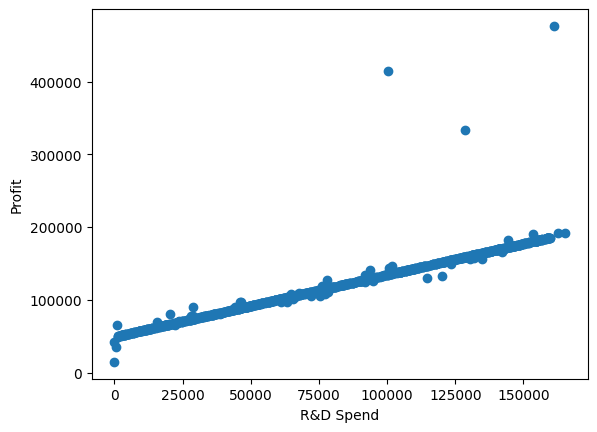

In [ ]:
plt.scatter(x_rd, y_rd)
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_rd, y_rd, test_size=0.3)

In [ ]:
# Converting in 2D array
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)

x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [ ]:
y_train

array([[ 52225.38599],
       [ 90550.60548],
       [ 74208.01155],
       [ 52609.81711],
       [ 94376.97653],
       [123690.2763 ],
       [123671.4819 ],
       [165941.819  ],
       [109877.2392 ],
       [114839.8177 ],
       [184632.0056 ],
       [ 70555.91594],
       [ 60243.7648 ],
       [ 77242.4545 ],
       [ 53395.76517],
       [142575.2414 ],
       [ 71376.03566],
       [144287.2413 ],
       [106070.5168 ],
       [ 96616.9285 ],
       [ 68705.52083],
       [153825.4044 ],
       [ 58918.75889],
       [185502.5285 ],
       [151782.7938 ],
       [162747.6235 ],
       [121916.7675 ],
       [160842.5538 ],
       [125867.0108 ],
       [ 62531.55709],
       [169059.9825 ],
       [ 79513.16096],
       [ 97427.84   ],
       [178552.8682 ],
       [107252.8561 ],
       [101119.044  ],
       [100958.4372 ],
       [ 86313.32028],
       [106169.6146 ],
       [105457.9899 ],
       [140870.0758 ],
       [104976.1696 ],
       [134307.35   ],
       [139

**Implementing y = mx + c**

In [ ]:
lin = LinearRegression()

# Fit the model
lin.fit(x_train, y_train)

c = lin.intercept_
m = lin.coef_

Y_pred_train = m * x_train + c
Y_pred_train

array([[ 52247.94597667],
       [ 90558.04484284],
       [ 74221.89863202],
       [ 52632.2254223 ],
       [ 94382.90625832],
       [123684.64096464],
       [123665.85396952],
       [165919.51390215],
       [109877.05350605],
       [114837.67417195],
       [184602.32659427],
       [ 70571.24389855],
       [ 60263.16125816],
       [ 77255.14438951],
       [ 53417.86340003],
       [142562.15524254],
       [ 71391.04004923],
       [144273.47970708],
       [106071.83304001],
       [ 96621.97449485],
       [ 68721.57883359],
       [153807.87973027],
       [ 58938.67810222],
       [185472.50605004],
       [151766.0749425 ],
       [162726.57868614],
       [121911.83178881],
       [160822.26054447],
       [125860.51658122],
       [ 62550.05093681],
       [169036.44718336],
       [ 79524.95498169],
       [103204.98882202],
       [178525.58762741],
       [107253.7058239 ],
       [101122.31378032],
       [100961.77036748],
       [ 86322.43139769],
       [1061

**Predicting x_train with y_train**

In [ ]:
y_pred_train = lin.predict(x_train)
print(y_pred)

[ 95127.62106008  65176.50783547 120422.80409595  99795.22377353
 106096.96677029 159258.96841799 158844.27294007 210289.4346206
 110739.05938872 129793.90379497 165491.95464159 133951.08136229
  64868.18922501  63688.52945783 165708.60110257 162441.62472831
 154705.52607181 250451.34585631 146748.8902823   87719.73266256
  59334.38653938 111264.02239848 105433.19415916  81094.53504012
 120411.9924245   52693.23813107  50673.37594615 110630.08606903
  95382.75227148  97460.124136    79127.86427744  62207.03840788
  72483.2085765  149819.97671131  98266.59939504 174017.66497855
  72182.6716076   53277.01306511  56299.23838957  86506.77713715
 142886.02907949 151128.49939269 116608.80595612 104498.28945421
 144367.52012944  88813.33871911  85377.71418901  96923.91609589
  73361.03098528 163601.38883302 181847.1655343  136812.17550471
 152993.98456056 130334.86757009 115760.38647013 161379.15339065
 170045.83241601  82521.54241719 114509.81085809 120779.55437045
  63317.94151129  73946.53

Text(0, 0.5, 'Profit')

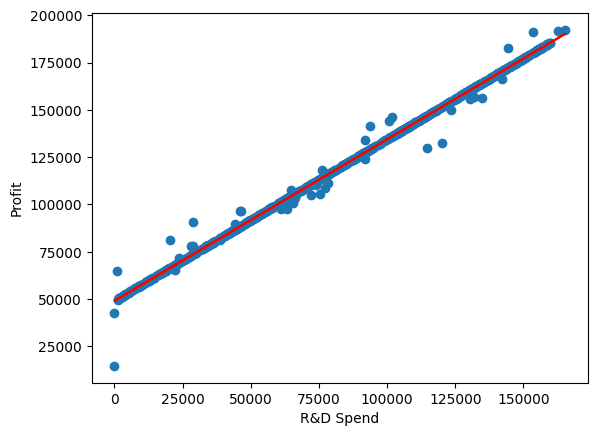

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train, color = 'red')

plt.xlabel('R&D Spend')
plt.ylabel('Profit')

**Predicting x_test with y_test**

In [ ]:
y_pred_test = lin.predict(x_test)
print(y_pred_test)

[[ 62241.77342598]
 [130418.92476069]
 [146484.36745092]
 [ 49519.60461043]
 [127068.86194914]
 [144736.32295048]
 [154521.78554482]
 [144793.53789016]
 [149833.57630815]
 [111421.85687748]
 [165562.56099488]
 [118940.92469694]
 [ 63680.68646128]
 [101974.56019529]
 [ 75981.898493  ]
 [173836.52443642]
 [154339.03931956]
 [164314.93372807]
 [ 85839.94720485]
 [170440.34809139]
 [115676.35125272]
 [180350.48801698]
 [149776.36136847]
 [ 68937.62927747]
 [ 99428.06840226]
 [ 72884.60616123]
 [ 80816.133919  ]
 [ 81591.52444485]
 [ 87054.27025303]
 [108776.30638291]
 [111461.13877637]
 [128929.6284203 ]
 [105334.87045873]
 [145863.54265765]
 [185038.69725364]
 [ 55013.05007655]
 [179494.82578471]
 [175973.11815411]
 [131651.18084967]
 [114968.32918347]
 [ 80240.56870488]
 [142276.08054413]
 [ 99281.1882586 ]
 [161762.46425478]
 [184998.56140043]
 [ 68227.13928022]
 [172912.54585826]
 [ 75458.42449262]
 [ 88718.62722976]
 [109333.08460191]
 [168378.90235417]
 [ 67749.77881332]
 [ 71250.991

Text(0, 0.5, 'Profit')

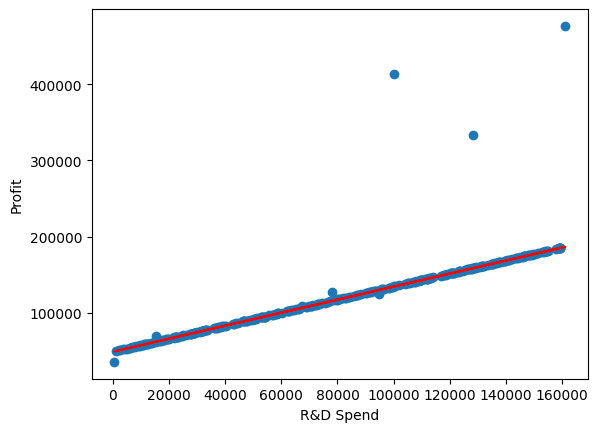

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color = 'red')

plt.xlabel('R&D Spend')
plt.ylabel('Profit')